In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/face/original'

image_data_generator = ImageDataGenerator(rescale=1./255)
generator = image_data_generator.flow_from_directory(root, target_size=(150, 150), batch_size=20, class_mode = 'categorical')
print(generator.class_indices)

Found 28709 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [6]:
import pandas as pd

face_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
face_df.file_paths = face_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
face_df

,file_paths,targets
0,./datasets/face/original/angry/Training_101184...,0
1,./datasets/face/original/angry/Training_101204...,0
2,./datasets/face/original/angry/Training_101313...,0
3,./datasets/face/original/angry/Training_101615...,0
4,./datasets/face/original/angry/Training_102183...,0
...,...,...
28704,./datasets/face/original/surprise/Training_999...,6
28705,./datasets/face/original/surprise/Training_999...,6
28706,./datasets/face/original/surprise/Training_999...,6
28707,./datasets/face/original/surprise/Training_999...,6


In [9]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = train_test_split(face_df.file_paths, face_df.targets, stratify=face_df.targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
3    5772
4    3972
5    3864
2    3277
0    3196
6    2537
1     349
Name: count, dtype: int64
targets
3    1443
4     993
5     966
2     820
0     799
6     634
1      87
Name: count, dtype: int64


In [10]:
import shutil
import os.path

root = './datasets/face/'


for filepath in train_images:
    face_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/')] + '/'
    destination = root + 'train/' + face_dir
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    shutil.copy2(filepath, destination)

In [11]:
import shutil
import os.path

root = './datasets/face/'


for filepath in validation_images:
    face_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/')] + '/'
    destination = root + 'validation/' + face_dir
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    shutil.copy2(filepath, destination)

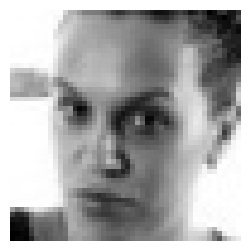

In [14]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[600]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

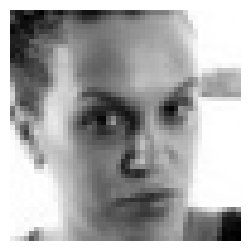

In [17]:
import numpy as np

data_generator = ImageDataGenerator(horizontal_flip=True)

# 4차원으로!
image_batch = np.expand_dims(image, axis=0)

data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)
aug_image_batch = next(data_gen_iter)

# 3차원으로!
aug_image = np.squeeze(aug_image_batch)
aug_image = aug_image.astype('int')

show_image(aug_image)